In [1]:
import sys
import os
%load_ext tensorboard

os.chdir("C:/Users/StarDust/PycharmProjects/phd/")

In [2]:
from run import inception_unet_predict

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [23]:
cer = inception_unet_predict("E:\\python\\phd\\datasets\\mrbrains_full_2013\\TrainingData\\1\\T1.nii", 7)

In [29]:
import nibabel as nib
affine = [[-0.95833302, 0., 0., 110.89199829], [0., -0.91877592, -0.85302001, 115.17299652], [0., -0.27249241, 2.87616897, -15.59920025], [0., 0., 0., 1.]]
cer2 = cer.astype(np.uint8)
#nifti_cer = nib.Nifti1Image(cer, affine)
nifti_cer = nib.Nifti1Image(cer2, affine)
print(nifti_cer.shape)

(240, 240, 48)


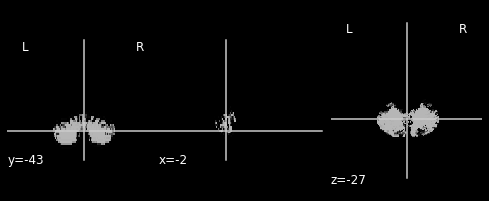

In [30]:
from nilearn.plotting import view_img, glass_brain, plot_anat, plot_epi
plot_anat(nifti_cer, display_mode='ortho', cmap='gray')

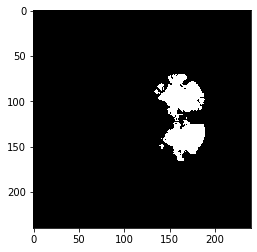

In [31]:
import matplotlib.pyplot as plt
plt.imshow(nifti_cer.get_fdata()[:,:,10], cmap='gray', aspect='equal', resample=False)


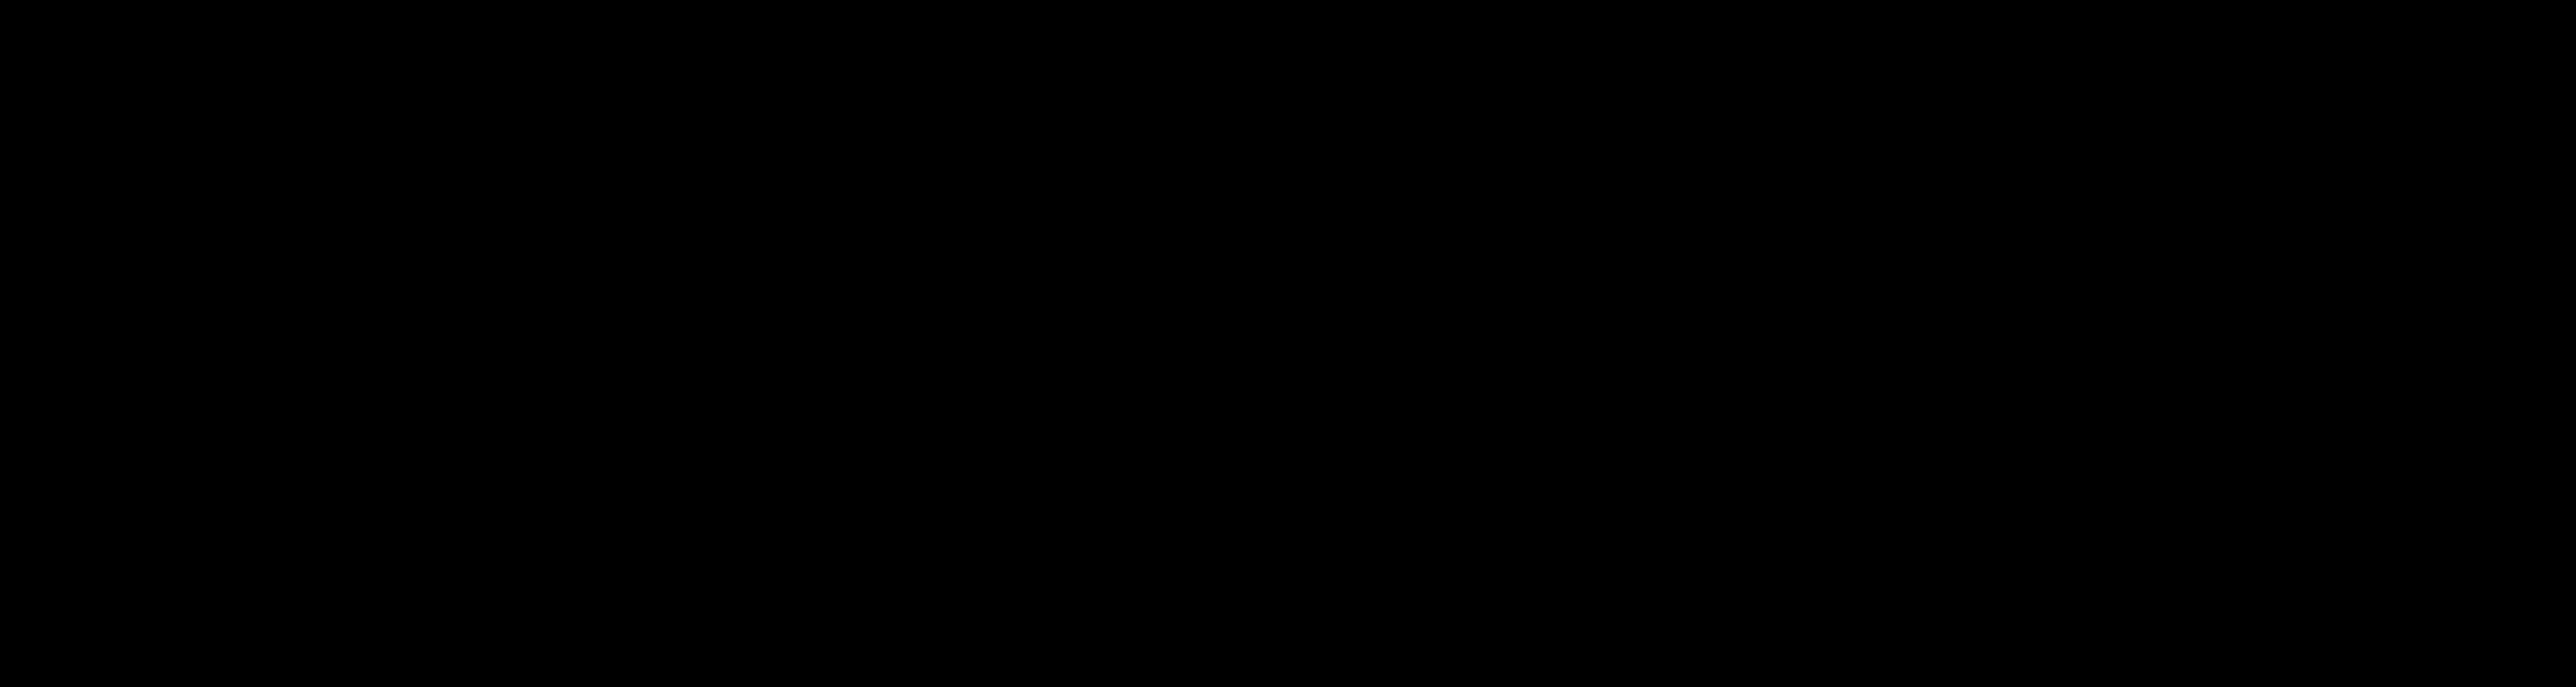
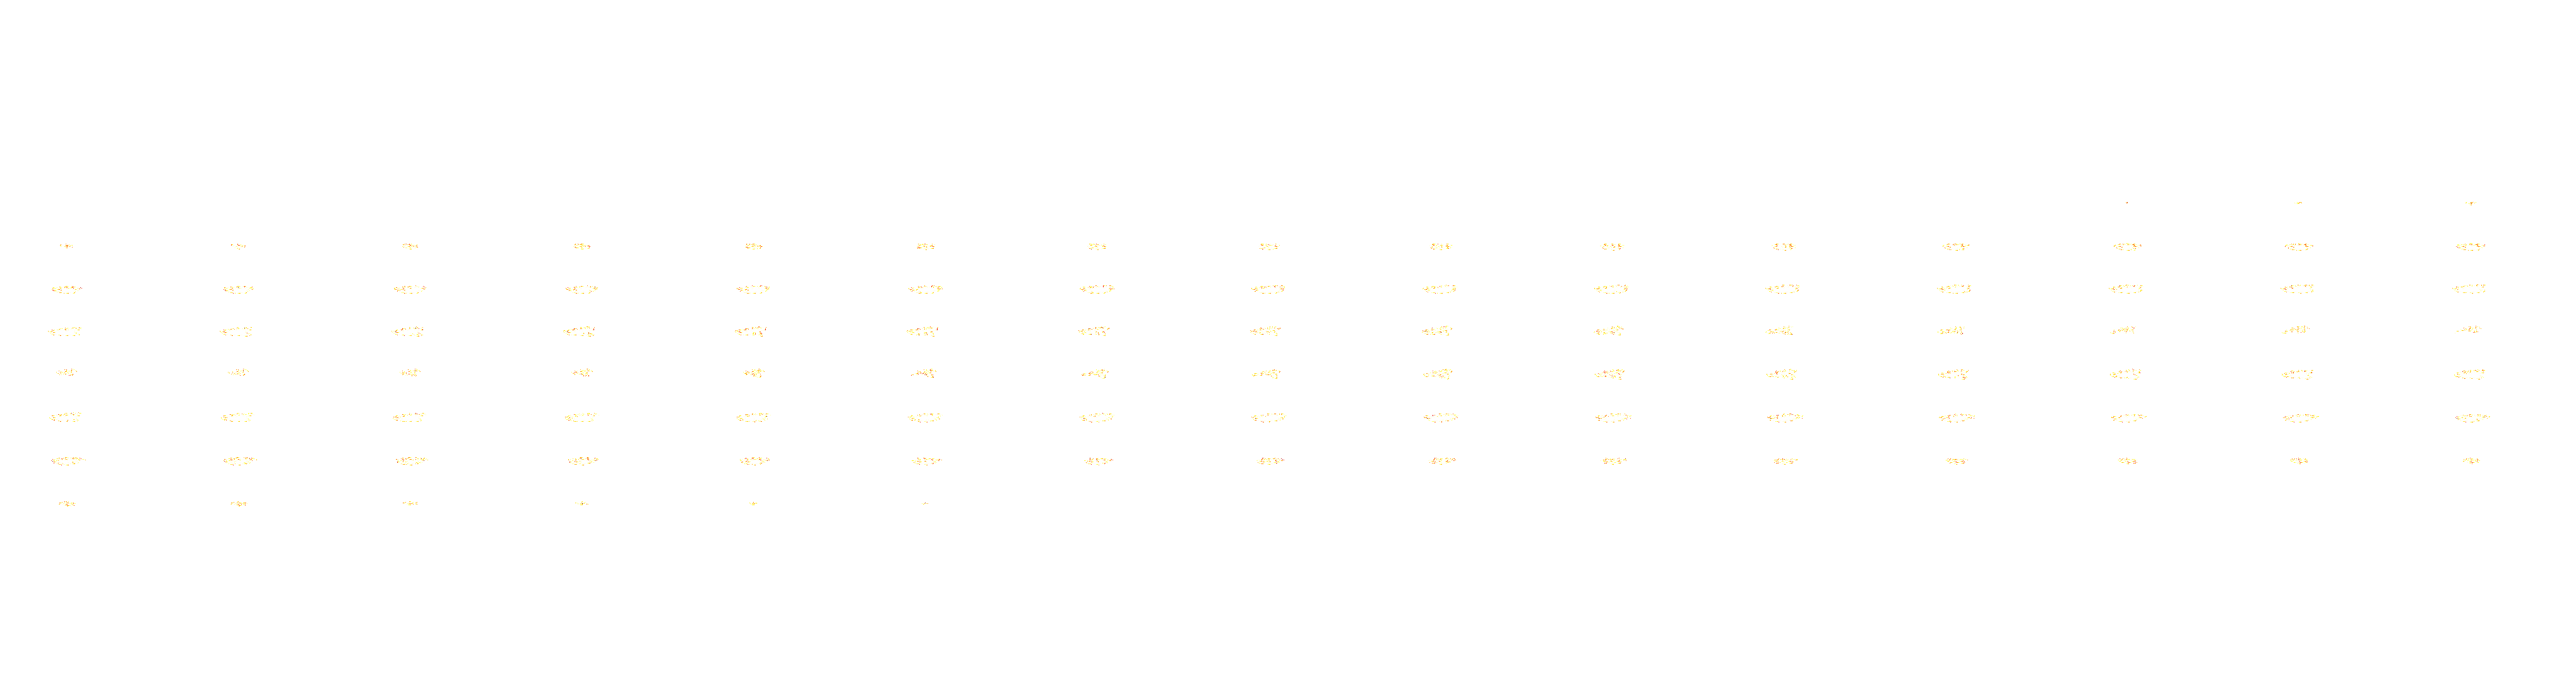

In [32]:
view_img(nifti_cer, None)

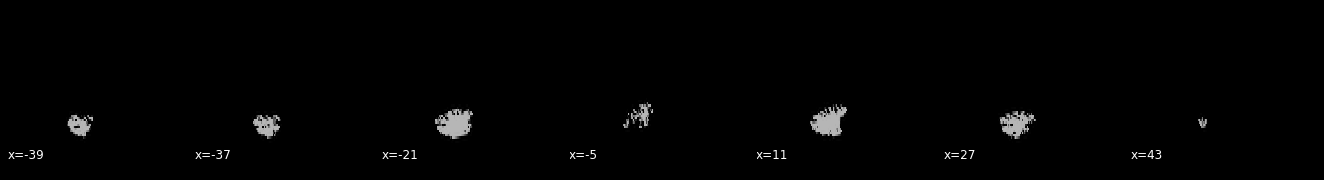

In [33]:
plot_anat(nifti_cer, draw_cross=False, display_mode='x')

In [34]:
nib.save(nifti_cer, "e:/python/CNN-TensorFlow/Brain-Segmentation-master/output/my_net_cerebellum3.nii")

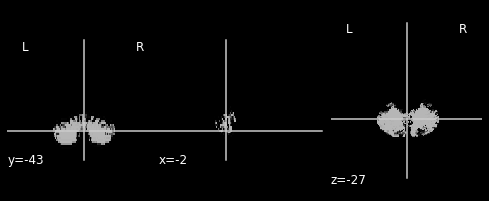

In [36]:
import numpy as np
cer2 = np.array(cer).astype(np.uint8)
nifti_cer2 = nib.Nifti1Image(cer2, affine)
plot_anat(nifti_cer2, display_mode='ortho')

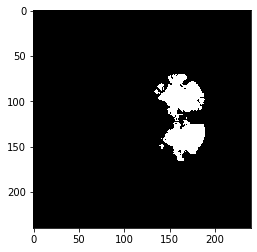

In [37]:
plt.imshow(nifti_cer2.get_fdata()[:,:,10], cmap='gray', aspect='equal', resample=False)


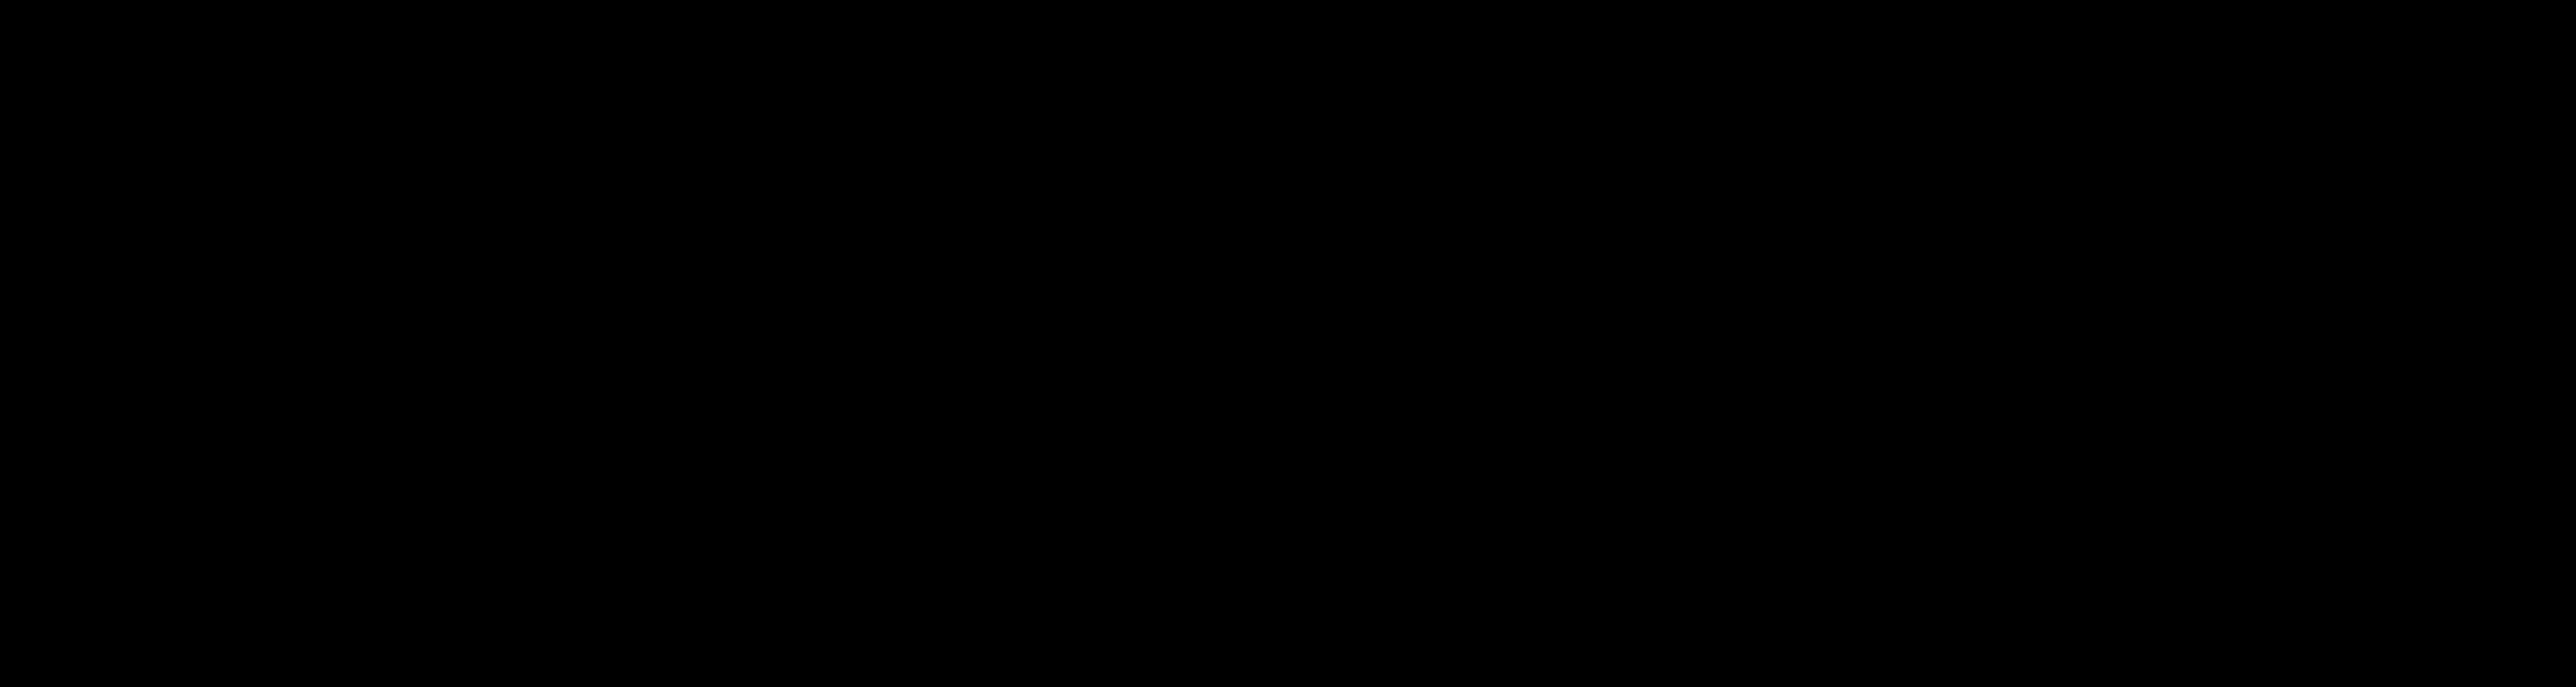
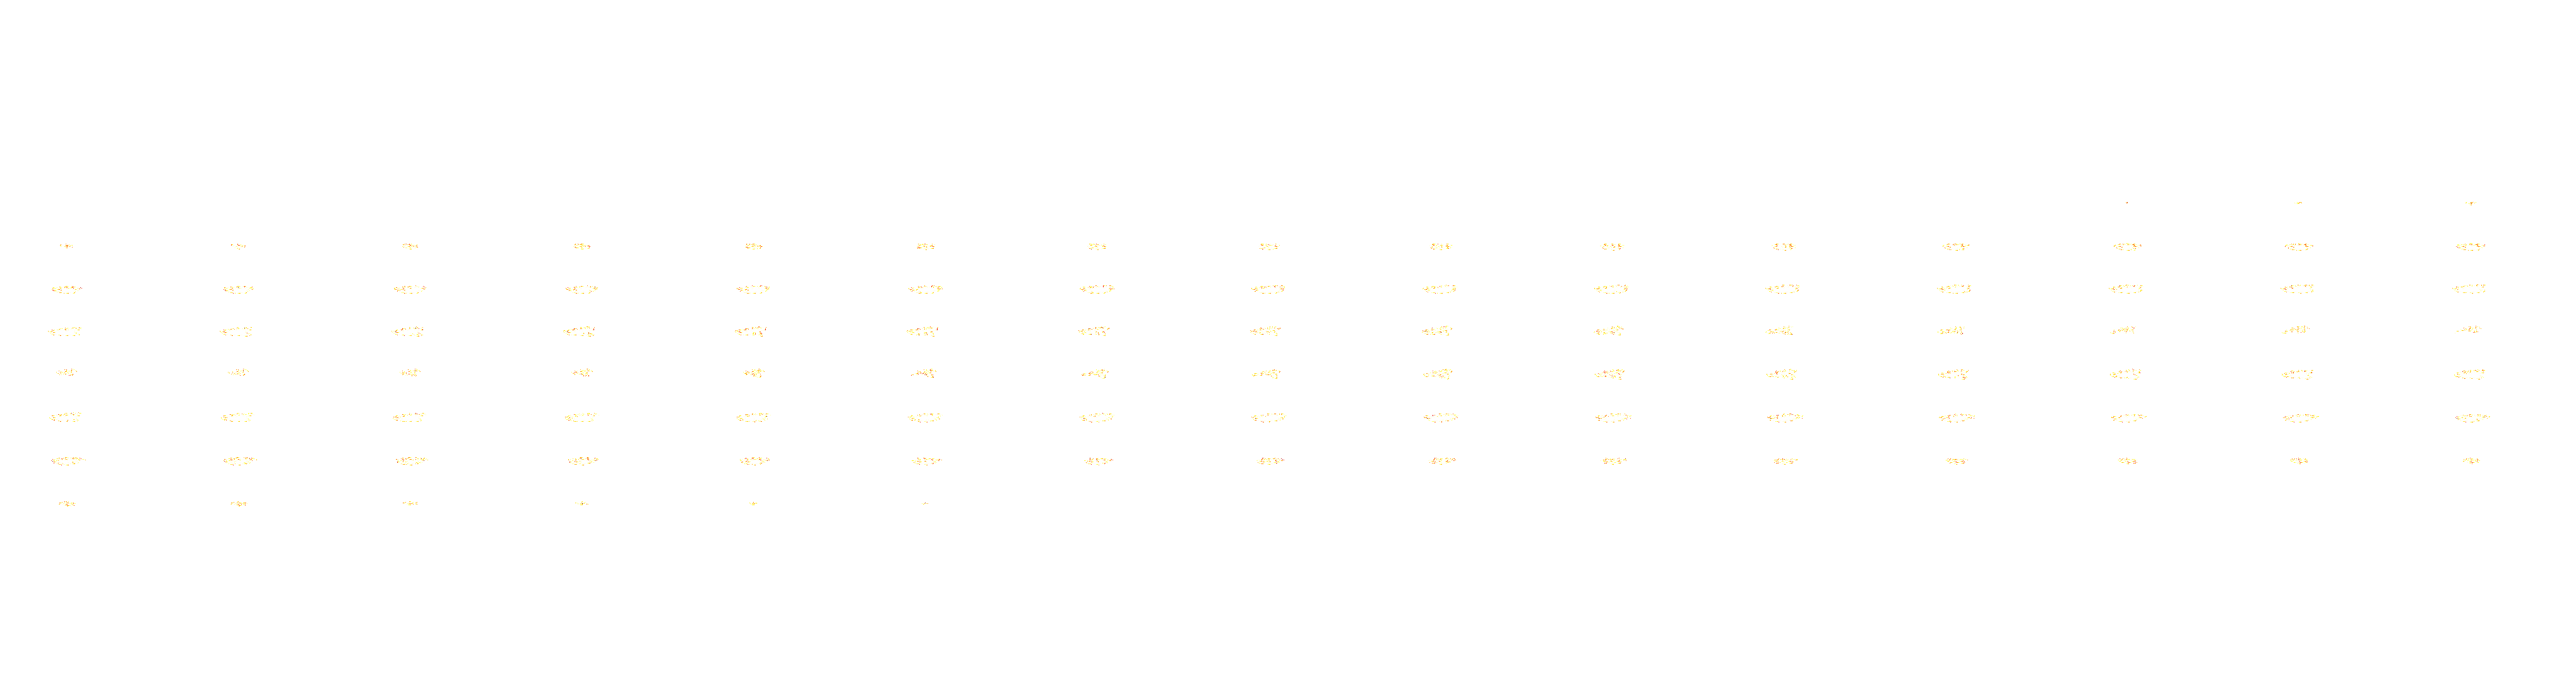

In [38]:
view_img(nifti_cer2, None)

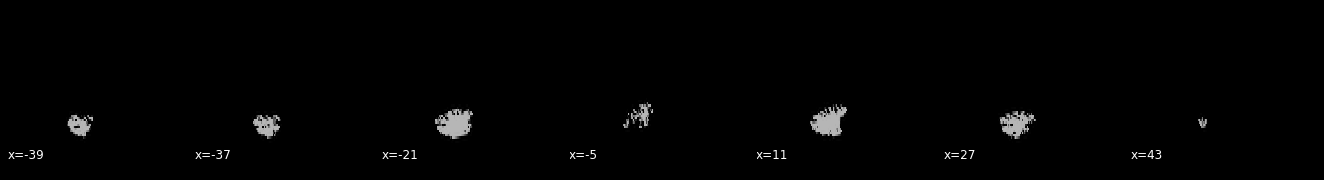

In [39]:
plot_anat(nifti_cer2, draw_cross=False, display_mode='x')

In [40]:
nib.save(nifti_cer2, "e:/python/CNN-TensorFlow/Brain-Segmentation-master/output/my_net_cerebellum2.nii")

In [41]:
orig = nib.load("E:\\python\\phd\\datasets\\mrbrains_full_2013\\TrainingData\\1\\LabelsForTraining.nii")

In [43]:
pred_ = np.array(nifti_cer2.get_data()).astype(np.uint8)
true_ = np.array(orig.get_data() == 7).astype(np.uint8)

C:\Users\StarDust\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.
C:\Users\StarDust\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


In [44]:
_int = 0
_uni = 0
for i in range(len(pred_)):
    for j in range(len(pred_[i])):
        for k in range(len(pred_[i][j])):
            if pred_[i][j][k]> 0 and pred_[i][j][k] == true_[i][j][k]:
                _int += 1
                _uni += 1
            elif pred_[i][j][k]> 0 or true_[i][j][k]> 0:
                _uni += 1

In [45]:
jc = _int * 1. / _uni
dc = 2. * _int / (_int + _uni)
print('jaccard similarity: {0}\ndice score: {1}'.format(jc, dc))

jaccard similarity: 0.7587188612099645
dice score: 0.8628085795224606
